Part 2 Data Wrangling

In [3]:
# Import needed libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import os
import scipy
from IPython.display import display_html
def display_side_by_side(*args):
   html_str=''
   for df in args:
       html_str+=df.to_html()
   display_html(html_str.replace('table','table style="display:inline"'),raw=True)
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

# Breaking up data file into different seasons

In [4]:
# Read in our file of data
df = pd.read_csv("2012-18_officialBoxScore.csv")
df.drop_duplicates( keep='first',inplace=True)

In [5]:
# Break up data frame to just the dates, team result, team free throws
DateRsltFta = df

wins = DateRsltFta[DateRsltFta['teamRslt'] == 'Win']
loss = DateRsltFta[DateRsltFta['teamRslt'] == 'Loss']

# Break up dataframes for each season
mask1213 = (DateRsltFta['gmDate'] >= '2012-10-30') & (DateRsltFta['gmDate'] <= '2013-04-17')
season1213 = DateRsltFta.loc[mask1213]

mask1314 = (DateRsltFta['gmDate'] >= '2013-10-29') & (DateRsltFta['gmDate'] <= '2014-04-16')
season1314 = DateRsltFta.loc[mask1314]

mask1415 = (DateRsltFta['gmDate'] >= '2014-10-28') & (DateRsltFta['gmDate'] <= '2015-04-15')
season1415 = DateRsltFta.loc[mask1415]

mask1516 = (DateRsltFta['gmDate'] >= '2015-10-27') & (DateRsltFta['gmDate'] <= '2016-04-13')
season1516 = DateRsltFta.loc[mask1516]

mask1617 = (DateRsltFta['gmDate'] >= '2016-10-25') & (DateRsltFta['gmDate'] <= '2017-04-12')
season1617 = DateRsltFta.loc[mask1617]

mask1718 = (DateRsltFta['gmDate'] >= '2017-10-17') & (DateRsltFta['gmDate'] <= '2018-04-11')
season1718 = DateRsltFta.loc[mask1718]



# Summing total wins and losses per season

In [6]:
# Break up data frame to see which team shot more free throws

# Season 2012-2013
moreFTA1213 = season1213[season1213['teamFTA'] > season1213['opptFTA']]
moreFTA1213.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1213Win = sum(moreFTA1213['teamRslt'] == 'Win')
sumMoreFTA1213Loss = sum(moreFTA1213['teamRslt'] == 'Loss')


moreFTA1213copy = moreFTA1213 
moreFTA1213copy.teamRslt[moreFTA1213copy.teamRslt == 'Win'] = 1
moreFTA1213copy.teamRslt[moreFTA1213copy.teamRslt == 'Loss'] = 0


# Season 2013-2014
moreFTA1314 = season1314[season1314['teamFTA'] > season1314['opptFTA']]
moreFTA1314.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1314Win = sum(moreFTA1314['teamRslt'] == 'Win')
sumMoreFTA1314Loss = sum(moreFTA1314['teamRslt'] == 'Loss')

# Season 2014-2015
moreFTA1415 = season1415[season1415['teamFTA'] > season1415['opptFTA']]
moreFTA1415.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1415Win = sum(moreFTA1415['teamRslt'] == 'Win')
sumMoreFTA1415Loss = sum(moreFTA1415['teamRslt'] == 'Loss')

# Season 2015-2016
moreFTA1516 = season1516[season1516['teamFTA'] > season1516['opptFTA']]
moreFTA1516.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1516Win = sum(moreFTA1516['teamRslt'] == 'Win')
sumMoreFTA1516Loss = sum(moreFTA1516['teamRslt'] == 'Loss')

# Season 2016-2017
moreFTA1617 = season1617[season1617['teamFTA'] > season1617['opptFTA']]
moreFTA1617.drop_duplicates( keep='first',inplace=True)
sumMoreFTA1617Win = sum(moreFTA1617['teamRslt'] == 'Win')
sumMoreFTA1617Loss = sum(moreFTA1617['teamRslt'] == 'Loss')

# Season 2017-2018
moreFTA1718 = season1718[season1718['teamFTA'] > season1718['opptFTA']]
moreFTA1718.drop_duplicates( keep='first',inplace=True) 
sumMoreFTA1718Win = sum(moreFTA1718['teamRslt'] == 'Win')
sumMoreFTA1718Loss = sum(moreFTA1718['teamRslt'] == 'Loss')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactives

# Graphing Wins vs. Losses when shooting more free throws than the opposing team (All seasons combined)

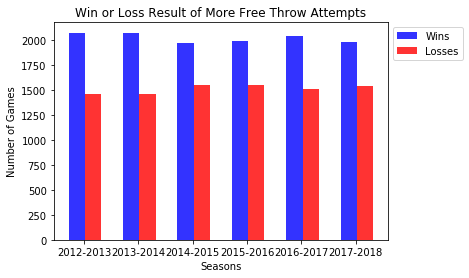

<Figure size 1080x1080 with 0 Axes>

In [8]:
seasons = ['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018']
wins = [sumMoreFTA1213Win, sumMoreFTA1314Win, sumMoreFTA1415Win, sumMoreFTA1516Win, sumMoreFTA1617Win, sumMoreFTA1718Win]
losses = [sumMoreFTA1213Loss, sumMoreFTA1314Loss, sumMoreFTA1415Loss, sumMoreFTA1516Loss, sumMoreFTA1617Loss, sumMoreFTA1718Loss]
# WinAndLossDf = pd.DataFrame(seasons,columns=['Seasons'])
# WinAndLossDf['Games Won'] = wins
# WinAndLossDf['Games Lost'] = losses
# WinAndLossDf.plot(x="Seasons", y=["Games Won", "Games Lost"],kind="bar", width=.4).legend(bbox_to_anchor=(1, 1))

# create plt
fig, ax = plt.subplots()
index = np.arange(6)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, wins, bar_width,
alpha=opacity,
color='b',
label='Wins')

rects2 = plt.bar(index + bar_width, losses, bar_width,
alpha=opacity,
color='r',
label='Losses')

plt.xlabel('Seasons')
plt.ylabel('Number of Games')
plt.title('Win or Loss Result of More Free Throw Attempts')
plt.xticks(index + bar_width-.17, seasons)
plt.legend()
plt.figure(figsize=(15,15))
# # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

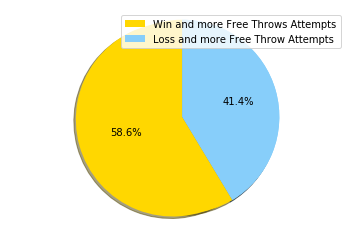

In [9]:
# For better visual, with a pie chart

labels = 'Win and more Free Throws Attempts', 'Loss and more Free Throw Attempts'
colors = ['gold', 'lightskyblue']
sizes = [sumMoreFTA1213Win, sumMoreFTA1213Loss]
explode = (0.1, 0)

patches,texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc="best")
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [10]:

# NBA Team Ranings 2012 - 2013

rank1 = pd.read_csv('12-13_Standing.csv')
rank1 = rank1.sort_values(by=['RANK'], ascending=True)
rank2 = pd.read_csv('13-14_Standing.csv')
rank2 = rank2.sort_values(by=['RANK'], ascending=True)
rank3 = pd.read_csv('14-15_Standing.csv')
rank3 = rank3.sort_values(by=['RANK'], ascending=True)
rank4 = pd.read_csv('15-16_Standing.csv')
rank4 = rank4.sort_values(by=['RANK'], ascending=True)
rank5 = pd.read_csv('16-17_Standing.csv')
rank5 = rank5.sort_values(by=['RANK'], ascending=True)
rank6 = pd.read_csv('17-18_Standing.csv')
rank6 = rank6.sort_values(by=['RANK'], ascending=True)

In [26]:

# Drop one of the duplicate column for each season

rank1 = rank1.drop(['RANKORD'], axis = 1)
rank2 = rank2.drop(['RANKORD'], axis = 1)
rank3 = rank3.drop(['RANKORD'], axis = 1)
rank4 = rank4.drop(['RANKORD'], axis = 1)
rank5 = rank5.drop(['RANKORD'], axis = 1)
rank6 = rank6.drop(['RANKORD'], axis = 1)

# Playoff Team ranking for reference (Each season)

In [11]:
# display data table 2012 - 13, 2013 - 14
display_side_by_side(rank1, rank2)

TEAM 
 RANK 
 RANKORD 
 WIN 
 LOST 
 
 
 
 
 20 
 OKC 
 1 
 1st 
 60 
 22 
 
 
 15 
 MIA 
 1 
 1st 
 66 
 16 
 
 
 25 
 SA 
 2 
 2nd 
 58 
 24 
 
 
 19 
 NY 
 2 
 2nd 
 54 
 28 
 
 
 7 
 DEN 
 3 
 3rd 
 57 
 25 
 
 
 11 
 IND 
 3 
 3rd 
 49 
 32 
 
 
 14 
 MEM 
 4 
 4th 
 56 
 26 
 
 
 1 
 BKN 
 4 
 4th 
 49 
 33 
 
 
 12 
 LAC 
 4 
 4th 
 56 
 26 
 
 
 4 
 CHI 
 5 
 5th 
 45 
 37 
 
 
 0 
 ATL 
 6 
 6th 
 44 
 38 
 
 
 9 
 GS 
 6 
 6th 
 47 
 35 
 
 
 13 
 LAL 
 7 
 7th 
 45 
 37 
 
 
 2 
 BOS 
 7 
 7th 
 41 
 40 
 
 
 10 
 HOU 
 7 
 7th 
 45 
 37 
 
 
 16 
 MIL 
 8 
 8th 
 38 
 44 
 
 
 27 
 TOR 
 9 
 9th 
 34 
 48 
 
 
 28 
 UTA 
 9 
 9th 
 43 
 39 
 
 
 22 
 PHI 
 9 
 9th 
 34 
 48 
 
 
 6 
 DAL 
 10 
 10th 
 41 
 41 
 
 
 24 
 POR 
 11 
 11th 
 33 
 49 
 
 
 29 
 WAS 
 11 
 11th 
 29 
 53 
 
 
 8 
 DET 
 11 
 11th 
 29 
 53 
 
 
 17 
 MIN 
 12 
 12th 
 31 
 51 
 
 
 5 
 CLE 
 13 
 13th 
 24 
 58 
 
 
 26 
 SAC 
 13 
 13th 
 28 
 54 
 
 
 18 
 NO 
 14 
 14th 
 27 
 55 
 
 
 3 
 CHA 
 14 
 14th 
 21 
 61 
 
 
 23 
 PHO 
 15 
 15th 
 25 
 57 
 
 
 21 
 ORL 
 15 
 15th 
 20 
 62 
 
 
 
 
 
 
 TEAM 
 RANK 
 RANKORD 
 WIN 
 LOST 
 
 
 
 
 24 
 SA 
 1 
 1st 
 62 
 20 
 
 
 10 
 IND 
 1 
 1st 
 56 
 26 
 
 
 14 
 MIA 
 2 
 2nd 
 54 
 28 
 
 
 19 
 OKC 
 2 
 2nd 
 59 
 23 
 
 
 26 
 TOR 
 3 
 3rd 
 48 
 34 
 
 
 3 
 CHI 
 3 
 3rd 
 48 
 34 
 
 
 11 
 LAC 
 3 
 3rd 
 57 
 25 
 
 
 23 
 POR 
 4 
 4th 
 54 
 28 
 
 
 9 
 HOU 
 4 
 4th 
 54 
 28 
 
 
 0 
 BKN 
 5 
 5th 
 44 
 38 
 
 
 28 
 WAS 
 5 
 5th 
 44 
 38 
 
 
 8 
 GS 
 6 
 6th 
 51 
 31 
 
 
 2 
 CHA 
 7 
 7th 
 43 
 39 
 
 
 13 
 MEM 
 7 
 7th 
 50 
 32 
 
 
 5 
 DAL 
 8 
 8th 
 49 
 33 
 
 
 18 
 NY 
 9 
 9th 
 37 
 45 
 
 
 22 
 PHO 
 9 
 9th 
 48 
 34 
 
 
 16 
 MIN 
 10 
 10th 
 40 
 42 
 
 
 4 
 CLE 
 10 
 10th 
 33 
 49 
 
 
 6 
 DEN 
 11 
 11th 
 36 
 46 
 
 
 7 
 DET 
 11 
 11th 
 29 
 53 
 
 
 17 
 NO 
 12 
 12th 
 34 
 48 
 
 
 1 
 BOS 
 12 
 12th 
 25 
 57 
 
 
 20 
 ORL 
 13 
 13th 
 23 
 59 
 
 
 25 
 SAC 
 13 
 13th 
 28 
 54 
 
 
 12 
 LAL 
 14 
 14th 
 27 
 55 
 
 
 21 
 PHI 
 14 
 14th 
 19 
 63 
 
 
 15 
 MIL 
 15 
 15th 
 15 
 67 
 
 
 27 
 UTA 
 15 
 15th 
 25 
 57

In [12]:
# display data table 2014 - 15, 2015 - 16
display_side_by_side(rank3, rank4)

TEAM 
 RANK 
 RANKORD 
 WIN 
 LOST 
 
 
 
 
 0 
 ATL 
 1 
 1st 
 60 
 22 
 
 
 9 
 GS 
 1 
 1st 
 67 
 15 
 
 
 12 
 LAC 
 2 
 2nd 
 56 
 26 
 
 
 5 
 CLE 
 2 
 2nd 
 53 
 29 
 
 
 10 
 HOU 
 2 
 2nd 
 56 
 26 
 
 
 4 
 CHI 
 3 
 3rd 
 50 
 32 
 
 
 27 
 TOR 
 4 
 4th 
 49 
 33 
 
 
 25 
 SA 
 4 
 4th 
 55 
 27 
 
 
 14 
 MEM 
 4 
 4th 
 55 
 27 
 
 
 29 
 WAS 
 5 
 5th 
 46 
 36 
 
 
 16 
 MIL 
 6 
 6th 
 41 
 41 
 
 
 24 
 POR 
 6 
 6th 
 51 
 31 
 
 
 6 
 DAL 
 7 
 7th 
 50 
 32 
 
 
 2 
 BOS 
 7 
 7th 
 40 
 42 
 
 
 11 
 IND 
 8 
 8th 
 38 
 44 
 
 
 1 
 BKN 
 8 
 8th 
 38 
 44 
 
 
 18 
 NO 
 8 
 8th 
 45 
 37 
 
 
 20 
 OKC 
 8 
 8th 
 45 
 37 
 
 
 15 
 MIA 
 10 
 10th 
 37 
 45 
 
 
 23 
 PHO 
 10 
 10th 
 39 
 43 
 
 
 3 
 CHA 
 11 
 11th 
 33 
 49 
 
 
 28 
 UTA 
 11 
 11th 
 38 
 44 
 
 
 7 
 DEN 
 12 
 12th 
 30 
 52 
 
 
 8 
 DET 
 12 
 12th 
 32 
 50 
 
 
 21 
 ORL 
 13 
 13th 
 25 
 57 
 
 
 26 
 SAC 
 13 
 13th 
 29 
 53 
 
 
 13 
 LAL 
 14 
 14th 
 21 
 61 
 
 
 22 
 PHI 
 14 
 14th 
 18 
 64 
 
 
 17 
 MIN 
 15 
 15th 
 16 
 66 
 
 
 19 
 NY 
 15 
 15th 
 17 
 65 
 
 
 
 
 
 
 TEAM 
 RANK 
 RANKORD 
 WIN 
 LOST 
 
 
 
 
 5 
 CLE 
 1 
 1st 
 57 
 25 
 
 
 9 
 GS 
 1 
 1st 
 73 
 9 
 
 
 27 
 TOR 
 2 
 2nd 
 56 
 26 
 
 
 25 
 SA 
 2 
 2nd 
 67 
 15 
 
 
 0 
 ATL 
 3 
 3rd 
 48 
 34 
 
 
 2 
 BOS 
 3 
 3rd 
 48 
 34 
 
 
 3 
 CHA 
 3 
 3rd 
 48 
 34 
 
 
 20 
 OKC 
 3 
 3rd 
 55 
 27 
 
 
 15 
 MIA 
 3 
 3rd 
 48 
 34 
 
 
 12 
 LAC 
 4 
 4th 
 53 
 29 
 
 
 24 
 POR 
 5 
 5th 
 44 
 38 
 
 
 14 
 MEM 
 6 
 6th 
 42 
 40 
 
 
 6 
 DAL 
 6 
 6th 
 42 
 40 
 
 
 11 
 IND 
 7 
 7th 
 45 
 37 
 
 
 10 
 HOU 
 8 
 8th 
 41 
 41 
 
 
 8 
 DET 
 8 
 8th 
 44 
 38 
 
 
 28 
 UTA 
 9 
 9th 
 40 
 42 
 
 
 4 
 CHI 
 9 
 9th 
 42 
 40 
 
 
 26 
 SAC 
 10 
 10th 
 33 
 49 
 
 
 7 
 DEN 
 10 
 10th 
 33 
 49 
 
 
 29 
 WAS 
 10 
 10th 
 41 
 41 
 
 
 21 
 ORL 
 11 
 11th 
 35 
 47 
 
 
 18 
 NO 
 12 
 12th 
 30 
 52 
 
 
 16 
 MIL 
 12 
 12th 
 33 
 49 
 
 
 17 
 MIN 
 13 
 13th 
 29 
 53 
 
 
 19 
 NY 
 13 
 13th 
 32 
 50 
 
 
 23 
 PHO 
 14 
 14th 
 23 
 59 
 
 
 1 
 BKN 
 14 
 14th 
 21 
 61 
 
 
 22 
 PHI 
 15 
 15th 
 10 
 72 
 
 
 13 
 LAL 
 15 
 15th 
 17 
 65

In [13]:
# display data table 2014 - 15, 2015 - 16
display_side_by_side(rank3, rank4)

TEAM 
 RANK 
 RANKORD 
 WIN 
 LOST 
 
 
 
 
 0 
 ATL 
 1 
 1st 
 60 
 22 
 
 
 9 
 GS 
 1 
 1st 
 67 
 15 
 
 
 12 
 LAC 
 2 
 2nd 
 56 
 26 
 
 
 5 
 CLE 
 2 
 2nd 
 53 
 29 
 
 
 10 
 HOU 
 2 
 2nd 
 56 
 26 
 
 
 4 
 CHI 
 3 
 3rd 
 50 
 32 
 
 
 27 
 TOR 
 4 
 4th 
 49 
 33 
 
 
 25 
 SA 
 4 
 4th 
 55 
 27 
 
 
 14 
 MEM 
 4 
 4th 
 55 
 27 
 
 
 29 
 WAS 
 5 
 5th 
 46 
 36 
 
 
 16 
 MIL 
 6 
 6th 
 41 
 41 
 
 
 24 
 POR 
 6 
 6th 
 51 
 31 
 
 
 6 
 DAL 
 7 
 7th 
 50 
 32 
 
 
 2 
 BOS 
 7 
 7th 
 40 
 42 
 
 
 11 
 IND 
 8 
 8th 
 38 
 44 
 
 
 1 
 BKN 
 8 
 8th 
 38 
 44 
 
 
 18 
 NO 
 8 
 8th 
 45 
 37 
 
 
 20 
 OKC 
 8 
 8th 
 45 
 37 
 
 
 15 
 MIA 
 10 
 10th 
 37 
 45 
 
 
 23 
 PHO 
 10 
 10th 
 39 
 43 
 
 
 3 
 CHA 
 11 
 11th 
 33 
 49 
 
 
 28 
 UTA 
 11 
 11th 
 38 
 44 
 
 
 7 
 DEN 
 12 
 12th 
 30 
 52 
 
 
 8 
 DET 
 12 
 12th 
 32 
 50 
 
 
 21 
 ORL 
 13 
 13th 
 25 
 57 
 
 
 26 
 SAC 
 13 
 13th 
 29 
 53 
 
 
 13 
 LAL 
 14 
 14th 
 21 
 61 
 
 
 22 
 PHI 
 14 
 14th 
 18 
 64 
 
 
 17 
 MIN 
 15 
 15th 
 16 
 66 
 
 
 19 
 NY 
 15 
 15th 
 17 
 65 
 
 
 
 
 
 
 TEAM 
 RANK 
 RANKORD 
 WIN 
 LOST 
 
 
 
 
 5 
 CLE 
 1 
 1st 
 57 
 25 
 
 
 9 
 GS 
 1 
 1st 
 73 
 9 
 
 
 27 
 TOR 
 2 
 2nd 
 56 
 26 
 
 
 25 
 SA 
 2 
 2nd 
 67 
 15 
 
 
 0 
 ATL 
 3 
 3rd 
 48 
 34 
 
 
 2 
 BOS 
 3 
 3rd 
 48 
 34 
 
 
 3 
 CHA 
 3 
 3rd 
 48 
 34 
 
 
 20 
 OKC 
 3 
 3rd 
 55 
 27 
 
 
 15 
 MIA 
 3 
 3rd 
 48 
 34 
 
 
 12 
 LAC 
 4 
 4th 
 53 
 29 
 
 
 24 
 POR 
 5 
 5th 
 44 
 38 
 
 
 14 
 MEM 
 6 
 6th 
 42 
 40 
 
 
 6 
 DAL 
 6 
 6th 
 42 
 40 
 
 
 11 
 IND 
 7 
 7th 
 45 
 37 
 
 
 10 
 HOU 
 8 
 8th 
 41 
 41 
 
 
 8 
 DET 
 8 
 8th 
 44 
 38 
 
 
 28 
 UTA 
 9 
 9th 
 40 
 42 
 
 
 4 
 CHI 
 9 
 9th 
 42 
 40 
 
 
 26 
 SAC 
 10 
 10th 
 33 
 49 
 
 
 7 
 DEN 
 10 
 10th 
 33 
 49 
 
 
 29 
 WAS 
 10 
 10th 
 41 
 41 
 
 
 21 
 ORL 
 11 
 11th 
 35 
 47 
 
 
 18 
 NO 
 12 
 12th 
 30 
 52 
 
 
 16 
 MIL 
 12 
 12th 
 33 
 49 
 
 
 17 
 MIN 
 13 
 13th 
 29 
 53 
 
 
 19 
 NY 
 13 
 13th 
 32 
 50 
 
 
 23 
 PHO 
 14 
 14th 
 23 
 59 
 
 
 1 
 BKN 
 14 
 14th 
 21 
 61 
 
 
 22 
 PHI 
 15 
 15th 
 10 
 72 
 
 
 13 
 LAL 
 15 
 15th 
 17 
 65

In [18]:
# display data table 2016 - 17, 2017 - 18
display_side_by_side(rank5, rank6)

TEAM 
 RANK 
 RANKORD 
 WIN 
 LOST 
 
 
 
 
 2 
 BOS 
 1 
 1st 
 53 
 29 
 
 
 9 
 GS 
 1 
 1st 
 67 
 15 
 
 
 27 
 TOR 
 2 
 2nd 
 51 
 31 
 
 
 25 
 SA 
 2 
 2nd 
 61 
 21 
 
 
 5 
 CLE 
 2 
 2nd 
 51 
 31 
 
 
 10 
 HOU 
 3 
 3rd 
 55 
 27 
 
 
 29 
 WAS 
 4 
 4th 
 49 
 33 
 
 
 28 
 UTA 
 4 
 4th 
 51 
 31 
 
 
 12 
 LAC 
 4 
 4th 
 51 
 31 
 
 
 0 
 ATL 
 5 
 5th 
 43 
 39 
 
 
 11 
 IND 
 6 
 6th 
 42 
 40 
 
 
 20 
 OKC 
 6 
 6th 
 47 
 35 
 
 
 16 
 MIL 
 6 
 6th 
 42 
 40 
 
 
 14 
 MEM 
 7 
 7th 
 43 
 39 
 
 
 24 
 POR 
 8 
 8th 
 41 
 41 
 
 
 4 
 CHI 
 8 
 8th 
 41 
 41 
 
 
 15 
 MIA 
 8 
 8th 
 41 
 41 
 
 
 7 
 DEN 
 9 
 9th 
 40 
 42 
 
 
 18 
 NO 
 10 
 10th 
 34 
 48 
 
 
 8 
 DET 
 10 
 10th 
 37 
 45 
 
 
 6 
 DAL 
 11 
 11th 
 33 
 49 
 
 
 3 
 CHA 
 11 
 11th 
 36 
 46 
 
 
 26 
 SAC 
 12 
 12th 
 32 
 50 
 
 
 19 
 NY 
 12 
 12th 
 31 
 51 
 
 
 21 
 ORL 
 13 
 13th 
 29 
 53 
 
 
 17 
 MIN 
 13 
 13th 
 31 
 51 
 
 
 13 
 LAL 
 14 
 14th 
 26 
 56 
 
 
 22 
 PHI 
 14 
 14th 
 28 
 54 
 
 
 23 
 PHO 
 15 
 15th 
 24 
 58 
 
 
 1 
 BKN 
 15 
 15th 
 20 
 62 
 
 
 
 
 
 
 TEAM 
 RANK 
 RANKORD 
 WIN 
 LOST 
 
 
 
 
 27 
 TOR 
 1.0 
 1st 
 59.0 
 23.0 
 
 
 10 
 HOU 
 1.0 
 1st 
 65.0 
 17.0 
 
 
 2 
 BOS 
 2.0 
 2nd 
 55.0 
 27.0 
 
 
 9 
 GS 
 2.0 
 2nd 
 58.0 
 24.0 
 
 
 22 
 PHI 
 3.0 
 3rd 
 52.0 
 30.0 
 
 
 24 
 POR 
 3.0 
 3rd 
 49.0 
 33.0 
 
 
 20 
 OKC 
 4.0 
 4th 
 48.0 
 34.0 
 
 
 5 
 CLE 
 4.0 
 4th 
 50.0 
 32.0 
 
 
 18 
 NO 
 4.0 
 4th 
 48.0 
 34.0 
 
 
 28 
 UTA 
 4.0 
 4th 
 48.0 
 34.0 
 
 
 11 
 IND 
 5.0 
 5th 
 48.0 
 34.0 
 
 
 16 
 MIL 
 6.0 
 6th 
 44.0 
 38.0 
 
 
 15 
 MIA 
 6.0 
 6th 
 44.0 
 38.0 
 
 
 25 
 SA 
 7.0 
 7th 
 47.0 
 35.0 
 
 
 17 
 MIN 
 7.0 
 7th 
 47.0 
 35.0 
 
 
 29 
 WAS 
 8.0 
 8th 
 43.0 
 39.0 
 
 
 8 
 DET 
 9.0 
 9th 
 39.0 
 43.0 
 
 
 7 
 DEN 
 9.0 
 9th 
 46.0 
 36.0 
 
 
 3 
 CHA 
 10.0 
 10th 
 36.0 
 46.0 
 
 
 12 
 LAC 
 10.0 
 10th 
 42.0 
 40.0 
 
 
 19 
 NY 
 11.0 
 11th 
 29.0 
 53.0 
 
 
 13 
 LAL 
 11.0 
 11th 
 35.0 
 47.0 
 
 
 1 
 BKN 
 12.0 
 12th 
 28.0 
 54.0 
 
 
 26 
 SAC 
 12.0 
 12th 
 27.0 
 55.0 
 
 
 6 
 DAL 
 13.0 
 13th 
 24.0 
 58.0 
 
 
 4 
 CHI 
 13.0 
 13th 
 27.0 
 55.0 
 
 
 14 
 MEM 
 14.0 
 14th 
 22.0 
 60.0 
 
 
 21 
 ORL 
 14.0 
 14th 
 25.0 
 57.0 
 
 
 23 
 PHO 
 15.0 
 15th 
 21.0 
 61.0 
 
 
 0 
 ATL 
 15.0 
 15th 
 24.0 
 58.0 
 
 
 30 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 31 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 32 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 33 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 34 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 35 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 36 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 37 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 38 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 39 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 40 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 41 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 42 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 43 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 44 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 45 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 46 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 47 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 48 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 49 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 50 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 51 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 52 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 53 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 54 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 55 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 56 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 57 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 58 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 59 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 60 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 61 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 62 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 63 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 64 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 65 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 66 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 67 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 68 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 69 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 70 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 71 

# Calculating each season's league average free throws per game

In [59]:
#League average free throw attempts

leagueAVG1213 = season1213['teamFTA'].sum() / len(season1213)

leagueAVG1314 = season1314['teamFTA'].sum() / len(season1314)

leagueAVG1415 = season1415['teamFTA'].sum() / len(season1415)

leagueAVG1516 = season1516['teamFTA'].sum() / len(season1516)

leagueAVG1617 = season1617['teamFTA'].sum() / len(season1617)

leagueAVG1718 = season1718['teamFTA'].sum() / len(season1718)


# Calculating Average Free Throw Attempts for teams that made the playoffs (For simplication, we will only look at the Season 2012-2013 and 2017-2018)

In [60]:
#Season 12-13 teams making playoffs

# Eastern Conference

# Seed 1
MIA1213 = season1213[season1213['teamAbbr'] == 'MIA']
MIAFTA1213 = MIA1213['teamFTA'].sum() / len(MIA1213)
MIA1213DIFF = MIAFTA1213 - leagueAVG1213;

# Seed 2
NY1213 = season1213[season1213['teamAbbr'] == 'NY']
NYFTA1213 = NY1213['teamFTA'].sum() / len(NY1213)
NY1213DIFF = NYFTA1213 - leagueAVG1213;



# Seed 3
IND1213 = season1213[season1213['teamAbbr'] == 'IND']
INDFTA1213 = IND1213['teamFTA'].sum() / len(IND1213)
IND1213DIFF = INDFTA1213 - leagueAVG1213;

# Seed 4
BKN1213 = season1213[season1213['teamAbbr'] == 'BKN']
BKNFTA1213 = BKN1213['teamFTA'].sum() / len(BKN1213)
BKN1213DIFF = BKNFTA1213 - leagueAVG1213;

# Seed 5
CHI1213 = season1213[season1213['teamAbbr'] == 'CHI']
CHIFTA1213 = CHI1213['teamFTA'].sum() / len(CHI1213)
CHI1213DIFF = CHIFTA1213 - leagueAVG1213;

# Seed 6
ATL1213 = season1213[season1213['teamAbbr'] == 'ATL']
ATLFTA1213 = ATL1213['teamFTA'].sum() / len(ATL1213)
ATL1213DIFF = ATLFTA1213 - leagueAVG1213;

# Seed 7
BOS1213 = season1213[season1213['teamAbbr'] == 'BOS']
BOSFTA1213 = BOS1213['teamFTA'].sum() / len(BOS1213)
BOS1213DIFF = BOSFTA1213 - leagueAVG1213;

# Seed 8
MIL1213 = season1213[season1213['teamAbbr'] == 'MIL']
MILFTA1213 = MIL1213['teamFTA'].sum() / len(MIL1213)
MIL1213DIFF = MILFTA1213 - leagueAVG1213;

East1213Top8 = [MIAFTA1213, NYFTA1213, INDFTA1213, BKNFTA1213, CHIFTA1213, ATLFTA1213, BOSFTA1213, MILFTA1213]
East1213Top8DIFF = [MIA1213DIFF, NY1213DIFF, IND1213DIFF, BKN1213DIFF, CHI1213DIFF, ATL1213DIFF, BOS1213DIFF, MIL1213DIFF]


# Western Conference

# Seed 1
OKC1213 = season1213[season1213['teamAbbr'] == 'OKC']
OKCFTA1213 = OKC1213['teamFTA'].sum() / len(OKC1213)
OKC1213DIFF = OKCFTA1213 - leagueAVG1213;

# Seed 2
SA1213 = season1213[season1213['teamAbbr'] == 'SA']
SAFTA1213 = SA1213['teamFTA'].sum() / len(SA1213)
SA1213DIFF = SAFTA1213 - leagueAVG1213;

# Seed 3
DEN1213 = season1213[season1213['teamAbbr'] == 'DEN']
DENFTA1213 = DEN1213['teamFTA'].sum() / len(DEN1213)
DEN1213DIFF = DENFTA1213 - leagueAVG1213;

# Seed 4
LAC1213 = season1213[season1213['teamAbbr'] == 'LAC']
LACFTA1213 = LAC1213['teamFTA'].sum() / len(LAC1213)
LAC1213DIFF = LACFTA1213 - leagueAVG1213;

# Seed 5
MEM1213 = season1213[season1213['teamAbbr'] == 'MEM']
MEMFTA1213 = MEM1213['teamFTA'].sum() / len(MEM1213)
MEM1213DIFF = MEMFTA1213 - leagueAVG1213;

# Seed 6
GS1213 = season1213[season1213['teamAbbr'] == 'GS']
GSFTA1213 = GS1213['teamFTA'].sum() / len(GS1213)
GS1213DIFF = GSFTA1213 - leagueAVG1213;

# Seed 7
LAL1213 = season1213[season1213['teamAbbr'] == 'LAL']
LALFTA1213 = LAL1213['teamFTA'].sum() / len(LAL1213)
LAL1213DIFF = LALFTA1213 - leagueAVG1213;

# Seed 8
HOU1213 = season1213[season1213['teamAbbr'] == 'HOU']
HOUFTA1213 = HOU1213['teamFTA'].sum() / len(HOU1213)
HOU1213DIFF = HOUFTA1213 - leagueAVG1213;

West1213Top8 = [OKCFTA1213, SAFTA1213, DENFTA1213, LACFTA1213, MEMFTA1213, GSFTA1213, LALFTA1213, HOUFTA1213]
West1213Top8DIFF = [OKC1213DIFF, SA1213DIFF, DEN1213DIFF, LAC1213DIFF, MEM1213DIFF, GS1213DIFF, LAL1213DIFF, HOU1213DIFF]

leagueAVG1213Index = [leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213, leagueAVG1213]

In [61]:
#Season 17-18 teams making playoffs

# Eastern Conference

# Seed 1
TOR1718 = season1718[season1718['teamAbbr'] == 'TOR']
TORFTA1718 = TOR1718['teamFTA'].sum() / len(TOR1718)
TOR1718DIFF = TORFTA1718 - leagueAVG1718;

# Seed 2
BOS1718 = season1718[season1718['teamAbbr'] == 'BOS']
BOSFTA1718 = BOS1718['teamFTA'].sum() / len(BOS1718)
BOS1718DIFF = BOSFTA1718 - leagueAVG1718;


# Seed 3
PHI1718 = season1718[season1718['teamAbbr'] == 'PHI']
PHIFTA1718 = PHI1718['teamFTA'].sum() / len(PHI1718)
PHI1718DIFF = PHIFTA1718 - leagueAVG1718;

# Seed 4
CLE1718 = season1718[season1718['teamAbbr'] == 'CLE']
CLEFTA1718 = CLE1718['teamFTA'].sum() / len(CLE1718)
CLE1718DIFF = CLEFTA1718 - leagueAVG1718;

# Seed 5
IND1718 = season1718[season1718['teamAbbr'] == 'IND']
INDFTA1718 = IND1213['teamFTA'].sum() / len(IND1718)
IND1718DIFF = INDFTA1718 - leagueAVG1718;

# Seed 6
MIA1718 = season1718[season1718['teamAbbr'] == 'MIA']
MIAFTA1718 = MIA1213['teamFTA'].sum() / len(MIA1718)
MIA1718DIFF = MIAFTA1718 - leagueAVG1718;

# Seed 7
MIL1718 = season1718[season1718['teamAbbr'] == 'MIL']
MILFTA1718 = MIL1213['teamFTA'].sum() / len(MIL1718)
MIL1718DIFF = MILFTA1718 - leagueAVG1718;

# Seed 8
WAS1718 = season1718[season1718['teamAbbr'] == 'WAS']
WASFTA1718 = WAS1718['teamFTA'].sum() / len(WAS1718)
WAS1718DIFF = WASFTA1718 - leagueAVG1718;

East1718Top8 = [TORFTA1718, BOSFTA1718, PHIFTA1718, CLEFTA1718, INDFTA1718, MIAFTA1718, MILFTA1718, WASFTA1718]
East1718Top8DIFF = [TOR1718DIFF, BOS1718DIFF, PHI1718DIFF, CLE1718DIFF, IND1718DIFF, MIA1718DIFF, MIL1718DIFF, WAS1718DIFF]

# Western Conference

# Seed 1
HOU1718 = season1718[season1718['teamAbbr'] == 'HOU']
HOUFTA1718 = HOU1718['teamFTA'].sum() / len(HOU1718)
HOU1718DIFF = HOUFTA1718 - leagueAVG1718;

# Seed 2
GS1718 = season1718[season1718['teamAbbr'] == 'GS']
GSFTA1718 = GS1718['teamFTA'].sum() / len(GS1718)
GS1718DIFF = GSFTA1718 - leagueAVG1718;

# Seed 3
POR1718 = season1718[season1718['teamAbbr'] == 'POR']
PORFTA1718 = POR1718['teamFTA'].sum() / len(POR1718)
POR1718DIFF = PORFTA1718 - leagueAVG1718;

# Seed 4
OKC1718 = season1718[season1718['teamAbbr'] == 'OKC']
OKCFTA1718 = OKC1718['teamFTA'].sum() / len(OKC1718)
OKC1718DIFF = OKCFTA1718 - leagueAVG1718;

# Seed 5
UTA1718 = season1718[season1718['teamAbbr'] == 'UTA']
UTAFTA1718 = UTA1718['teamFTA'].sum() / len(UTA1718)
UTA1718DIFF = UTAFTA1718 - leagueAVG1718;

# Seed 6
NO1718 = season1718[season1718['teamAbbr'] == 'NO']
NOFTA1718 = NO1718['teamFTA'].sum() / len(NO1718)
NO1718DIFF = NOFTA1718 - leagueAVG1718;

# Seed 7
SA1718 = season1718[season1718['teamAbbr'] == 'SA']
SAFTA1718 = SA1718['teamFTA'].sum() / len(SA1718)
SA1718DIFF = SAFTA1718 - leagueAVG1718;

# Seed 8
MIN1718 = season1718[season1718['teamAbbr'] == 'MIN']
MINFTA1718 = MIN1718['teamFTA'].sum() / len(MIN1718)
MIN1718DIFF = MINFTA1718 - leagueAVG1718;

West1718Top8 = [HOUFTA1718, GSFTA1718, PORFTA1718, OKCFTA1718, UTAFTA1718, NOFTA1718, SAFTA1718, MINFTA1718]
West1718Top8DIFF = [HOU1718DIFF, GS1718DIFF, POR1718DIFF, OKC1718DIFF, UTA1718DIFF, NO1718DIFF, SA1718DIFF, MIN1718DIFF]

leagueAVG1718Index = [leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718, leagueAVG1718]

# Checking for correlation in free throws per game between teams making the playoffs and the league average of 2012-2013 and 2017-2018 season (Comparing averages and the differences)

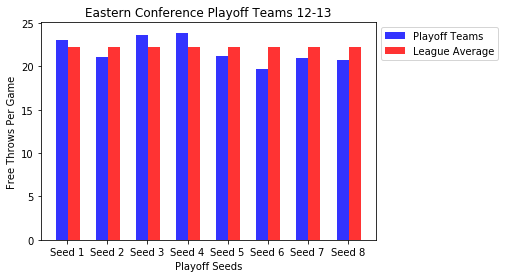

<Figure size 1080x1080 with 0 Axes>

In [62]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1213Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1213Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('Eastern Conference Playoff Teams 12-13')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

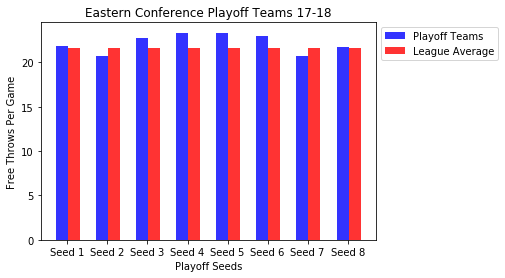

<Figure size 1080x1080 with 0 Axes>

In [63]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1718Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1718Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('Eastern Conference Playoff Teams 17-18')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

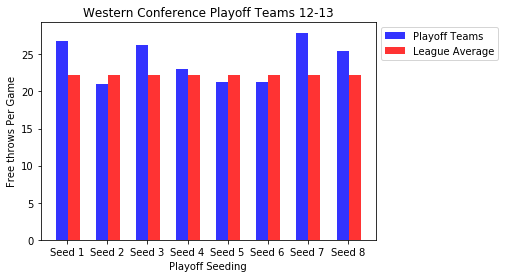

<Figure size 1080x1080 with 0 Axes>

In [64]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1213Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1213Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('Western Conference Playoff Teams 12-13')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

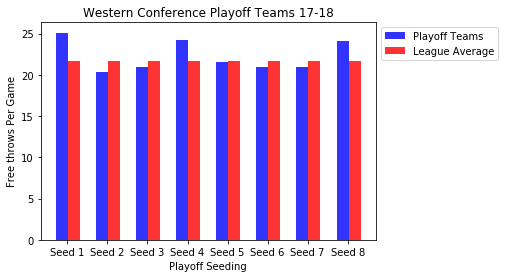

<Figure size 1080x1080 with 0 Axes>

In [65]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1718Top8 , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

rects2 = plt.bar(index + bar_width, leagueAVG1718Index, bar_width,
alpha=opacity,
color='r',
label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('Western Conference Playoff Teams 17-18')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

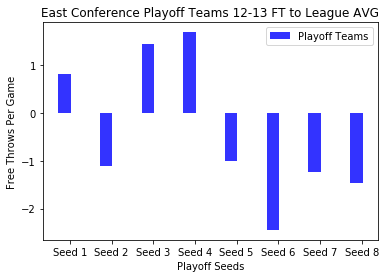

<Figure size 1080x1080 with 0 Axes>

In [66]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1213Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

#rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('East Conference Playoff Teams 12-13 FT to League AVG')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

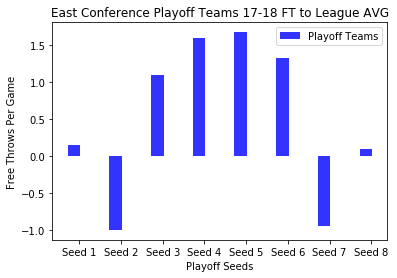

<Figure size 1080x1080 with 0 Axes>

In [67]:
playOffSeed = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8']

# create plt
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, East1718Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

#rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeds')
plt.ylabel('Free Throws Per Game')
plt.title('East Conference Playoff Teams 17-18 FT to League AVG')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

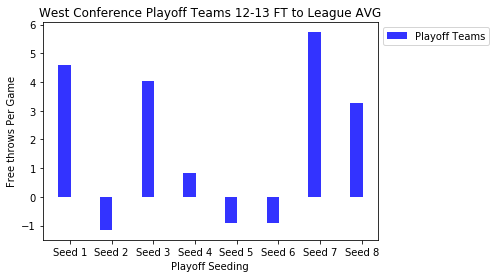

<Figure size 1080x1080 with 0 Axes>

In [68]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1213Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

# rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('West Conference Playoff Teams 12-13 FT to League AVG')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

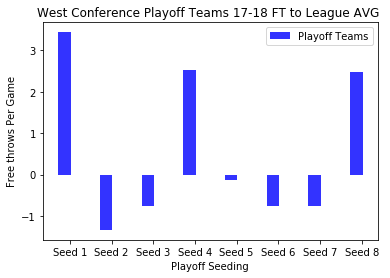

<Figure size 1080x1080 with 0 Axes>

In [69]:
fig, ax = plt.subplots()
index = np.arange(8)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, West1718Top8DIFF , bar_width,
alpha=opacity,
color='b',
label='Playoff Teams')

# rects2 = plt.bar(index + bar_width, leagueAVGIndex, bar_width,
# alpha=opacity,
# color='r',
# label='League Average')

plt.xlabel('Playoff Seeding')
plt.ylabel('Free throws Per Game')
plt.title('West Conference Playoff Teams 17-18 FT to League AVG ')
plt.xticks(index + bar_width-.17, playOffSeed)
plt.legend()
plt.figure(figsize=(15,15))
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.tight_layout()

plt.show()

In [70]:
# 2012-2013 T-Test Data

East1213Stats = scipy.stats.ttest_1samp(East1213Top8, leagueAVG1213)
West1213Stats = scipy.stats.ttest_1samp(West1213Top8, leagueAVG1213)

dataEast1213 = [[East1213Stats[0], East1213Stats[1]/2]]
East1213_statTable = pd.DataFrame(dataEast1213, columns=['Test Statistic', 'p-value'])

dataWest1213 = [[West1213Stats[0], West1213Stats[1]/2]]
West1213_statTable = pd.DataFrame(dataWest1213, columns=['Test Statistic', 'p-value'])

In [71]:
# 2017-2018 T-Test Data

East1718Stats = scipy.stats.ttest_1samp(East1718Top8, leagueAVG1718)
West1718Stats = scipy.stats.ttest_1samp(West1718Top8, leagueAVG1718)

dataEast1718 = [[East1718Stats[0], East1718Stats[1]/2]]
East1718_statTable = pd.DataFrame(dataEast1718, columns=['Test Statistic', 'p-value'])

dataWest1718 = [[West1718Stats[0], West1718Stats[1]/2]]
West1718_statTable = pd.DataFrame(dataWest1718, columns=['Test Statistic', 'p-value'])

# East Playoff Teams 12-13 T-Test Results


In [72]:
East1213_statTable

Test Statistic   p-value
0       -0.759076  0.236294

# East Playoff Teams 17-18 T-Test Results

In [73]:
East1718_statTable

Test Statistic   p-value
0        1.314815  0.115004

# West Playoff Teams 12-13 T-Test Results

In [58]:
West1213_statTable

Test Statistic   p-value
0        1.961229  0.045328

# West Playoff Teams 17-18 T-Test Results

In [111]:
West1718_statTable

Test Statistic   p-value
0        0.876004  0.205039